In [1]:
from datetime import datetime
from datetime import date

import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)
color = sns.color_palette("tab10")

In [2]:
def skimming(df):
    df_info = pd.DataFrame({
                    'feature': df.columns.values,
                    'data_type': df.dtypes.values,
                    'null_value(%)': df.isna().mean().values * 100,
                    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
                    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
                    'duplicate' : df.duplicated().sum(),
                    'n_unique': df.nunique().values,
                    'sample_unique': [df[col].unique() for col in df.columns]}
                ).round(3)
    return df_info

# Motorcycles Data

In [3]:
df_mp = pd.read_csv('motorcycle_profile.csv')

print('Total data: ', len(df_mp))
df_mp.head()

Total data:  94


,_id,vehicle_id,borrower_id,created_at
0,65e02edae2ff307bcb8cfc60,ZETA-13122200161408,66535eeaa072500b02cad408,2024-02-29
1,65e036c78302dcfa8047f5d5,ZETA-13122200078708,66b3a5c5483c9a05361af84f,2024-02-29
2,65e037238302dcfa8047f5e2,NEOVA-2902240001,65c1f0baa212e8a49b1bdeb2,2024-02-29
3,65e037898302dcfa8047f619,NEOVA-2902240002,660294ad7d6b28b948b4c9dc,2024-02-29
4,65e037c18302dcfa8047f61e,NEOVA-2902240003,65c1fa52a212e8a49b1be8fe,2024-02-29


In [4]:
skimming(df_mp)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,_id,object,0.0,0,0,0,94,"[65e02edae2ff307bcb8cfc60, 65e036c78302dcfa804..."
1,vehicle_id,object,0.0,0,0,0,94,"[ZETA-13122200161408, ZETA-13122200078708, NEO..."
2,borrower_id,object,0.0,0,0,0,94,"[66535eeaa072500b02cad408, 66b3a5c5483c9a05361..."
3,created_at,object,0.0,0,0,0,7,"[2024-02-29, 2024-03-04, 2024-03-06, 2024-03-0..."


In [5]:
today = pd.to_datetime(datetime.today().date())

# Create vehicle_name column from vehicle_id to visualize the proportion of vehicle type.
df_mp['vehicle_name'] = df_mp['vehicle_id'].str.split('-').str[0]

#  Create a new column motor_age_month to know the motor age in months
df_mp['created_at'] = pd.to_datetime(df_mp['created_at'], errors='coerce')
df_mp['motor_age_months'] = ((pd.to_datetime("today") - df_mp['created_at']) / pd.Timedelta(days=30)).astype(int)

df_mp.head()

,_id,vehicle_id,borrower_id,created_at,vehicle_name,motor_age_months
0,65e02edae2ff307bcb8cfc60,ZETA-13122200161408,66535eeaa072500b02cad408,2024-02-29,ZETA,16
1,65e036c78302dcfa8047f5d5,ZETA-13122200078708,66b3a5c5483c9a05361af84f,2024-02-29,ZETA,16
2,65e037238302dcfa8047f5e2,NEOVA-2902240001,65c1f0baa212e8a49b1bdeb2,2024-02-29,NEOVA,16
3,65e037898302dcfa8047f619,NEOVA-2902240002,660294ad7d6b28b948b4c9dc,2024-02-29,NEOVA,16
4,65e037c18302dcfa8047f61e,NEOVA-2902240003,65c1fa52a212e8a49b1be8fe,2024-02-29,NEOVA,16


In [6]:
df_mp['motor_age_months'].value_counts()

16    94
Name: motor_age_months, dtype: int64

# Users Data

In [7]:
df_up = pd.read_csv('user_profile.csv')

print('Total data: ', len(df_up))
df_up.head()

Total data:  53


,user_id,status,date_of_birth,gender,marital_status,city,avg_income,work_experience,total_service_month
0,65a49860c82194319d884204,21,1981-12-10,0,1,KABUPATEN BEKASI,NaN,NaN,NaN
1,65a0e3c40bcf99800b9c292a,22,1987-07-06,0,1,KABUPATEN BEKASI,6582400.0,Gojek,72.0
2,65cc42cfa3d3b8b472d22cfc,22,1993-08-25,0,0,KABUPATEN BEKASI,3060000.0,Grab,84.0
3,65a0e8e40bcf99800b9c326c,22,1998-02-17,0,1,KABUPATEN KEPULAUAN SERIBU,6880125.0,Gojek,36.0
4,659e53610bcf99800b9c1979,22,1988-11-10,0,0,KOTA BEKASI,3020067.0,Grab,48.0


In [8]:
skimming(df_up)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,user_id,object,0.000,0.0,0.000,0,53,"[65a49860c82194319d884204, 65a0e3c40bcf99800b9..."
1,status,int64,0.000,0.0,0.000,0,5,"[21, 22, 20, 18, 16]"
2,date_of_birth,object,0.000,0.0,0.000,0,52,"[1981-12-10, 1987-07-06, 1993-08-25, 1998-02-1..."
3,gender,int64,0.000,0.0,90.566,0,2,"[0, 1]"
4,marital_status,int64,0.000,0.0,11.321,0,3,"[1, 0, 2]"
5,city,object,0.000,0.0,0.000,0,12,"[KABUPATEN BEKASI, KABUPATEN KEPULAUAN SERIBU,..."
6,avg_income,float64,9.434,0.0,0.000,0,43,"[nan, 6582400.0, 3060000.0, 6880125.0, 3020067..."
7,work_experience,object,9.434,0.0,0.000,0,5,"[nan, Gojek, Grab, Maxim, Lainnya, Shopee Expr..."
8,total_service_month,float64,9.434,0.0,0.000,0,13,"[nan, 72.0, 84.0, 36.0, 48.0, 60.0, 70.0, 12.0..."


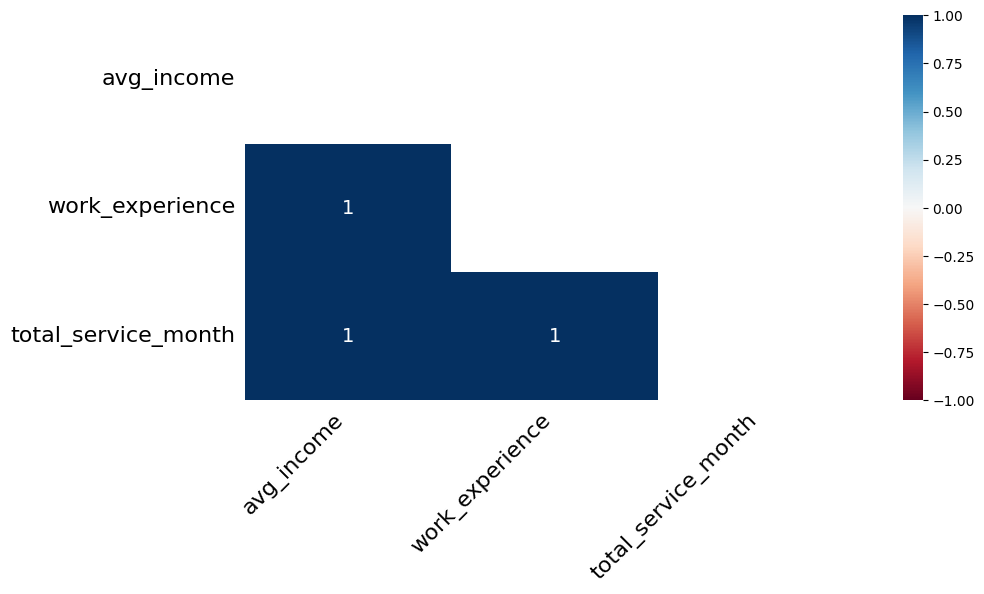

In [9]:
msno.heatmap(df_up, figsize=(10, 5))
plt.show()

- There are no `duplicate` data in the `user_profile` (up) table.
- There are 0 values (`0_value`) in the `gender` and `marital_status` columns. This is still considered normal if the 0 value is used as a representation of a certain category.
- There are `missing values` in the `avg_income`, `work_experience`, and `total_service_month` columns.
- Based on the heatmap above, it can be seen that there is one-valued relationship between columns that has `missing value`. That is, when a column has a `missing value` on a particular row, the other columns also tend to be missing on the same row

In [10]:
# Replace the Lainnya value to Others
df_up['work_experience'] = df_up['work_experience'].replace('Lainnya', 'Others')

# Fill the missing value in the work_experience column with other because there are other options
df_up['work_experience'].fillna('Others', inplace=True)

# Fill the missing value in the ‘avg_income’ column based on the average per 'city'
df_up['avg_income'] = df_up.groupby('city')['avg_income'].transform(lambda x: x.fillna(x.mean()))
df_up['total_service_month'].fillna(df_up['total_service_month'].median(), inplace=True)

In [11]:
df_up.isna().sum()

user_id                0
status                 0
date_of_birth          0
gender                 0
marital_status         0
city                   0
avg_income             0
work_experience        0
total_service_month    0
dtype: int64

In [12]:
# Convert 'date_of_birth' column to datetime format
df_up['date_of_birth'] = pd.to_datetime(df_up['date_of_birth'])

# Map numeric gender codes to string labels
df_up['gender'] = df_up['gender'].map({0: 'Male', 1: 'Female'})

# Map marital status codes to descriptive labels
df_up['marital_status'] = df_up['marital_status'].map({
    0: 'Single',
    1: 'Married',
    2: 'Divorced'
})

# Map loan/customer status codes to descriptive status labels
df_up['status'] = df_up['status'].map({
    16: 'Normal Active',
    18: 'Late Active',
    20: 'Inactive',
    21: 'Default Active',
    22: 'Paid Off',
})

df_up.head()

,user_id,status,date_of_birth,gender,marital_status,city,avg_income,work_experience,total_service_month
0,65a49860c82194319d884204,Default Active,1981-12-10,Male,Married,KABUPATEN BEKASI,5103813.2,Others,48.0
1,65a0e3c40bcf99800b9c292a,Paid Off,1987-07-06,Male,Married,KABUPATEN BEKASI,6582400.0,Gojek,72.0
2,65cc42cfa3d3b8b472d22cfc,Paid Off,1993-08-25,Male,Single,KABUPATEN BEKASI,3060000.0,Grab,84.0
3,65a0e8e40bcf99800b9c326c,Paid Off,1998-02-17,Male,Married,KABUPATEN KEPULAUAN SERIBU,6880125.0,Gojek,36.0
4,659e53610bcf99800b9c1979,Paid Off,1988-11-10,Male,Single,KOTA BEKASI,3020067.0,Grab,48.0


In [13]:
# Define bins and labels for loyalty levels based on total months of service
loyalty_bins = [0, 24, 48, 60, np.inf] 
loyalty_labels = ['New User', 'Moderately Loyal', 'Loyal User', 'Highly Loyal']

# Assign loyalty level based on total_service_month using the defined bins
df_up['loyalty_level'] = pd.cut(df_up['total_service_month'], bins=loyalty_bins, labels=loyalty_labels, right=True)

# Function to calculate age from date of birth
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_up['age'] = df_up['date_of_birth'].apply(calculate_age)

# Define bins and labels for age ranges
age_bins = [0, 25, 35, 45, np.inf] 
age_labels = ['<25 y.o', '25-35 y.o', '36-45 y.o', '>45 y.o']

# Assign age range category based on calculated age
df_up['age_range'] = pd.cut(df_up['age'], bins=age_bins, labels=age_labels, right=True)

df_up.head()

,user_id,status,date_of_birth,gender,marital_status,city,avg_income,work_experience,total_service_month,loyalty_level,age,age_range
0,65a49860c82194319d884204,Default Active,1981-12-10,Male,Married,KABUPATEN BEKASI,5103813.2,Others,48.0,Moderately Loyal,43,36-45 y.o
1,65a0e3c40bcf99800b9c292a,Paid Off,1987-07-06,Male,Married,KABUPATEN BEKASI,6582400.0,Gojek,72.0,Highly Loyal,38,36-45 y.o
2,65cc42cfa3d3b8b472d22cfc,Paid Off,1993-08-25,Male,Single,KABUPATEN BEKASI,3060000.0,Grab,84.0,Highly Loyal,31,25-35 y.o
3,65a0e8e40bcf99800b9c326c,Paid Off,1998-02-17,Male,Married,KABUPATEN KEPULAUAN SERIBU,6880125.0,Gojek,36.0,Moderately Loyal,27,25-35 y.o
4,659e53610bcf99800b9c1979,Paid Off,1988-11-10,Male,Single,KOTA BEKASI,3020067.0,Grab,48.0,Moderately Loyal,36,36-45 y.o


# Trips Data

In [14]:
df_trips = pd.read_csv('trips.csv')

print('Total data: ', len(df_trips))
df_trips.head()

Total data:  46883


,data_id,vehicle_id,trip_id,avg_speed,duration,max_speed,total_mileage,start_point,end_point,start_trip_timestamp,end_trip_timestamp
0,6672dba53da25e05433b6bde,ZETA-16052300196711,TRIP-MC16052300196711-2024-06-14-006,NaN,9.93,NaN,2.00,"-6.242823,106.852627","-6.230470,106.851685",2024-06-14 08:03:00,2024-06-14 08:13:00
1,66278788d5bf5b1efe723abd,NEOVA-0403240018,TRIP-MH2ACC1H6PJ001844-28/03/2024 02:51-005,NaN,3.00,41.0,1.35,"-6.365288, 106.800047","-6.368373, 106.804725",2024-03-28 02:51:00,2024-03-28 02:54:00
2,667e67353da25e0543927527,ZETA-16052300462311,TRIP-MC16052300462311-2024-06-27-007,23.29,4.90,45.2,2.30,NaN,NaN,2024-06-27 15:48:00,2024-06-27 15:53:00
3,6677da043da25e05435f1aae,ZETA-16052300351211,TRIP-MC16052300351211-2024-06-21-020,NaN,15.47,NaN,9.00,"-6.269271,106.998934","-6.291963,106.963832",2024-06-21 22:51:00,2024-06-21 23:07:00
4,6674ffe33da25e05434eb51e,ZETA-13122200323608,TRIP-MC13122200323608-2024-06-19-003,NaN,104.45,NaN,11.60,"-6.199029,106.761769","-6.167047,106.766380",2024-06-19 11:42:00,2024-06-19 13:26:00


In [15]:
skimming(df_trips)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,data_id,object,0.000,0.0,0.0,0,46883,"[6672dba53da25e05433b6bde, 66278788d5bf5b1efe7..."
1,vehicle_id,object,0.000,0.0,0.0,0,84,"[ZETA-16052300196711, NEOVA-0403240018, ZETA-1..."
2,trip_id,object,0.000,0.0,0.0,0,46883,"[TRIP-MC16052300196711-2024-06-14-006, TRIP-MH..."
3,avg_speed,float64,90.336,0.0,0.0,0,823,"[nan, 23.29, 24.08, 21.89, 15.7, 19.08, 25.92,..."
4,duration,float64,1.395,0.0,0.0,0,3667,"[9.93, 3.0, 4.9, 15.47, 104.45, 25.15, 10.57, ..."
5,max_speed,float64,21.935,0.0,0.0,0,159,"[nan, 41.0, 45.2, 36.1, 38.0, 48.0, 30.7, 32.5..."
6,total_mileage,float64,0.077,0.0,0.0,0,2756,"[2.0, 1.35, 2.3, 9.0, 11.6, 8.9, 2.4, 32.1, 3...."
7,start_point,object,1.504,0.0,0.0,0,46089,"[-6.242823,106.852627, -6.365288, 106.800047, ..."
8,end_point,object,1.549,0.0,0.0,0,46030,"[-6.230470,106.851685, -6.368373, 106.804725, ..."
9,start_trip_timestamp,object,0.000,0.0,0.0,0,35971,"[2024-06-14 08:03:00, 2024-03-28 02:51:00, 202..."


- Only 84 unique vehicle_ids, indicating high reuse of vehicles across trips.
- avg_speed has 90.34% missing values — too high, consider dropping or imputing with caution.
- max_speed has 21.93% missing values — needs attention.
- No Negative or Zero Values: All features have 0% negative or zero values
- No duplicate rows found, data quality is solid

In [16]:
# Drop rows where either 'end_point' or 'start_point' is missing
df_trips.dropna(subset=['end_point', 'start_point'], inplace=True)

# Fill missing values in 'duration' with the median duratio
df_trips['duration'].fillna(df_trips['duration'].median(), inplace=True)

# Fill missing values in 'total_mileage' with the median mileage
df_trips['total_mileage'].fillna(df_trips['total_mileage'].median(), inplace=True)

# Fill missing values in 'max_speed' with the median max speed
df_trips['max_speed'].fillna(df_trips['max_speed'].median(), inplace=True)

# Fill missing values in 'avg_speed' by calculating average speed = total_mileage / (duration in hours)
df_trips['avg_speed'].fillna((df_trips['total_mileage']/(df_trips['duration']/60)), inplace=True)

In [17]:
df_trips.isna().mean()*100

data_id                 0.0
vehicle_id              0.0
trip_id                 0.0
avg_speed               0.0
duration                0.0
max_speed               0.0
total_mileage           0.0
start_point             0.0
end_point               0.0
start_trip_timestamp    0.0
end_trip_timestamp      0.0
dtype: float64

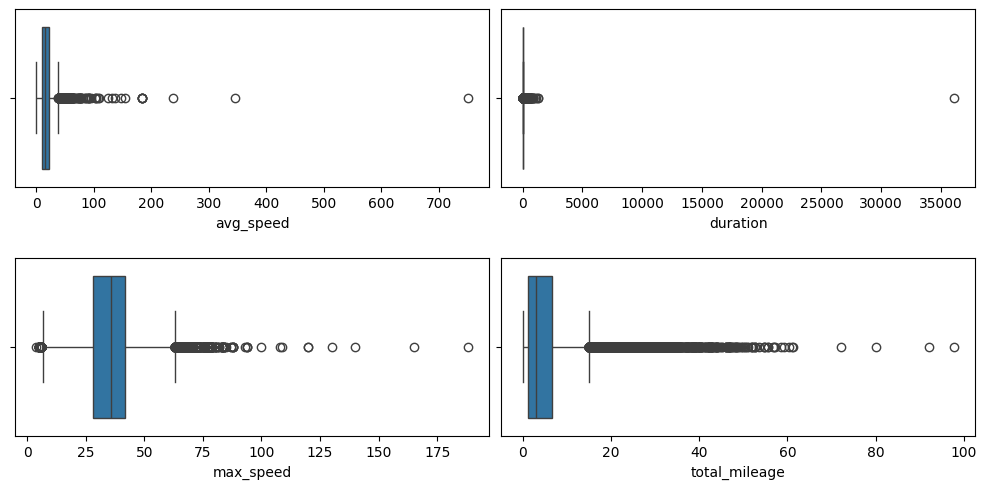

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,5))
index = 0
axs = axs.flatten()
for k, v in df_trips.select_dtypes(include=[np.number]).items():
    sns.boxplot(x=k, data=df_trips, ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)

- Almost all variables showed many outliers, both for speed and duration and distance traveled.
- This suggests either very high variation in usage, or possible data anomalies.
- Most values are below 50 km/h (within the box), but there are outliers above 700 km/h, which is unrealistic.
- Almost all durations are below 5,000 minutes, but there is one extreme outlier above 35,000.
- The main range is between 20-60 km/h, with outliers above 150 km/h.
- The majority of mileage per trip is below 20 km, but there are outliers up to almost 100 km.

**`Insights:`**
- Need for data validation and cleaning - speeds >200 km/h are very likely to be sensor errors, system errors, or reporting bugs.
- Vehicle utilization time within a trip is relatively consistent, but extreme outliers could be indicators of missed trips, units not shut down, or abnormal activity.
- Vehicles are generally used at reasonable speeds, but high-speed outliers should be investigated for system errors.

In [19]:
# Filter the trip data to only store trips that make sense (remove extreme outliers)
df_trips = df_trips[~(
    (df_trips['duration'] > 300) |         # Remove if trip duration is more than 5 hours 
    (df_trips['total_mileage'] > 75) |     # Remove if mileage is more than 75 km
    (df_trips['avg_speed'] > 50) |         # Remove if average speed is more than 50 km/h 
    (df_trips['max_speed'] > 100)          # Remove if maximum speed is more than 100 km/h
)]

- `total_mileage > 75`: Karena jarak maksimal layanan seperti GoSend Instan adalah 75 km. Lebih dari itu kemungkinan besar error, penggunaan pribadi, atau tidak relevan.
- `max_speed > 100`: Kecepatan di atas 100 km/jam sangat tidak mungkin terjadi di wilayah padat seperti Jabodetabek, kemungkinan besar error sensor.
- `avg_speed > 50:` Rata-rata kecepatan normal di kota hanya 20–40 km/jam. Di atas 50 km/jam sudah tidak realistis untuk lalu lintas harian.
- `duration > 300`: Dengan kecepatan 20 km/jam, jarak 75 km ditempuh dalam ±225 menit. Durasi >300 menit cenderung anomali (trip tertinggal atau sistem tidak dimatikan).

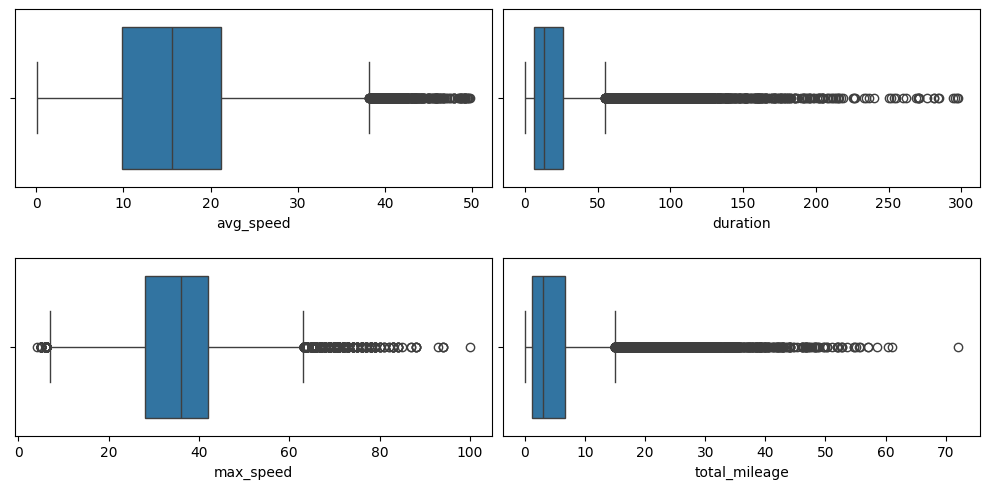

In [20]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,5))
index = 0
axs = axs.flatten()
for k, v in df_trips.select_dtypes(include=[np.number]).items():
    sns.boxplot(x=k, data=df_trips, ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)

In [21]:
print('Total data: ', len(df_trips))
df_trips.head()


Total data:  45972


,data_id,vehicle_id,trip_id,avg_speed,duration,max_speed,total_mileage,start_point,end_point,start_trip_timestamp,end_trip_timestamp
0,6672dba53da25e05433b6bde,ZETA-16052300196711,TRIP-MC16052300196711-2024-06-14-006,12.084592,9.93,36.0,2.00,"-6.242823,106.852627","-6.230470,106.851685",2024-06-14 08:03:00,2024-06-14 08:13:00
1,66278788d5bf5b1efe723abd,NEOVA-0403240018,TRIP-MH2ACC1H6PJ001844-28/03/2024 02:51-005,27.000000,3.00,41.0,1.35,"-6.365288, 106.800047","-6.368373, 106.804725",2024-03-28 02:51:00,2024-03-28 02:54:00
3,6677da043da25e05435f1aae,ZETA-16052300351211,TRIP-MC16052300351211-2024-06-21-020,34.906270,15.47,36.0,9.00,"-6.269271,106.998934","-6.291963,106.963832",2024-06-21 22:51:00,2024-06-21 23:07:00
4,6674ffe33da25e05434eb51e,ZETA-13122200323608,TRIP-MC13122200323608-2024-06-19-003,6.663475,104.45,36.0,11.60,"-6.199029,106.761769","-6.167047,106.766380",2024-06-19 11:42:00,2024-06-19 13:26:00
5,6678fbbe3da25e0543660019,ZETA-16052300280311,TRIP-MC16052300280311-2024-06-22-007,21.232604,25.15,36.0,8.90,"-6.115276,106.892824","-6.133036,106.903273",2024-06-22 12:37:00,2024-06-22 13:03:00


In [22]:
df_trips['start_trip_timestamp'] = pd.to_datetime(df_trips['start_trip_timestamp'])
df_trips['end_trip_timestamp'] = pd.to_datetime(df_trips['end_trip_timestamp'])

In [23]:
# Define time bins and labels for categorizing start time of trips
time_bins = [0, 5, 11, 15, 20, 24] 
time_labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']

# Define duration bins and labels in minutes
duration_bins = [0, 15, 30, 60, 90, np.inf] 
duration_label = ['<15 minutes', '16-30 minutes', '31-60 minutes', '61-90 minutes', '>90 minutes']

# Define distance bins and labels in kilometers
distance_bins = [0, 3, 5, 10, 20, np.inf] 
distance_label = ['<3 km', '3-5 km', '6-10 km','11-20 km', '>20 km']

# Extract day name from start timestamp (e.g., Monday, Tuesday)
df_trips['start_trip_day'] = df_trips['start_trip_timestamp'].dt.day_name()

# Categorize day as 'Weekdays' or 'Weekend' based on start day
df_trips['start_trip_day_cat'] = df_trips['start_trip_timestamp'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

# Categorize start time into time-of-day bins (e.g., Morning, Noon, etc.)
df_trips['start_trip_time_cat'] = pd.cut(df_trips['start_trip_timestamp'].dt.hour, bins=time_bins, labels=time_labels, right=False)

# Bin total mileage into defined distance categories
df_trips['distance_bins'] = pd.cut(df_trips['total_mileage'], bins=distance_bins, labels=distance_label)

# Bin trip duration into defined duration categories
df_trips['duration_bins'] = pd.cut(df_trips['duration'], bins=duration_bins, labels=duration_label)

df_trips

,data_id,vehicle_id,trip_id,avg_speed,duration,max_speed,total_mileage,start_point,end_point,start_trip_timestamp,end_trip_timestamp,start_trip_day,start_trip_day_cat,start_trip_time_cat,distance_bins,duration_bins
0,6672dba53da25e05433b6bde,ZETA-16052300196711,TRIP-MC16052300196711-2024-06-14-006,12.084592,9.93,36.0,2.00,"-6.242823,106.852627","-6.230470,106.851685",2024-06-14 08:03:00,2024-06-14 08:13:00,Friday,Weekdays,Morning,<3 km,<15 minutes
1,66278788d5bf5b1efe723abd,NEOVA-0403240018,TRIP-MH2ACC1H6PJ001844-28/03/2024 02:51-005,27.000000,3.00,41.0,1.35,"-6.365288, 106.800047","-6.368373, 106.804725",2024-03-28 02:51:00,2024-03-28 02:54:00,Thursday,Weekdays,Midnight,<3 km,<15 minutes
3,6677da043da25e05435f1aae,ZETA-16052300351211,TRIP-MC16052300351211-2024-06-21-020,34.906270,15.47,36.0,9.00,"-6.269271,106.998934","-6.291963,106.963832",2024-06-21 22:51:00,2024-06-21 23:07:00,Friday,Weekdays,Night,6-10 km,16-30 minutes
4,6674ffe33da25e05434eb51e,ZETA-13122200323608,TRIP-MC13122200323608-2024-06-19-003,6.663475,104.45,36.0,11.60,"-6.199029,106.761769","-6.167047,106.766380",2024-06-19 11:42:00,2024-06-19 13:26:00,Wednesday,Weekdays,Noon,11-20 km,>90 minutes
5,6678fbbe3da25e0543660019,ZETA-16052300280311,TRIP-MC16052300280311-2024-06-22-007,21.232604,25.15,36.0,8.90,"-6.115276,106.892824","-6.133036,106.903273",2024-06-22 12:37:00,2024-06-22 13:03:00,Saturday,Weekend,Noon,6-10 km,16-30 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46878,667bae0e3da25e0543769d74,ZETA-16052300480211,TRIP-MC16052300480211-2024-06-24-007,20.340000,20.30,36.1,2.20,"-6.287323,106.702932","-6.284014,106.702260",2024-06-24 12:02:00,2024-06-24 12:22:00,Monday,Weekdays,Noon,<3 km,16-30 minutes
46879,6672dbaa3da25e05433b94d2,ZETA-16052300480211,TRIP-MC16052300480211-2024-06-14-006,4.669261,15.42,36.0,1.20,"-6.282057,106.702724","-6.287419,106.702940",2024-06-14 10:53:00,2024-06-14 11:08:00,Friday,Weekdays,Morning,<3 km,16-30 minutes
46880,6673e4c23da25e054341877c,ZETA-16052300480211,TRIP-MC16052300480211-2024-06-15-005,9.205776,11.08,36.0,1.70,"-6.287681,106.703001","-6.280975,106.710237",2024-06-15 08:28:00,2024-06-15 08:39:00,Saturday,Weekend,Morning,<3 km,<15 minutes
46881,6673ee843da25e054344afb4,ZETA-16052300480211,TRIP-MC16052300480211-2024-06-17-005,21.428571,12.88,36.0,4.60,"-6.287670,106.703055","-6.287637,106.703105",2024-06-17 04:18:00,2024-06-17 04:31:00,Monday,Weekdays,Midnight,3-5 km,<15 minutes


In [ ]:
# Export to csv
df_up.to_csv('clean_user.csv', index=False)
df_mp.to_csv('clean_motorcycle.csv', index=False)
df_trips.to_csv('clean_trips.csv', index=False)